In [1]:
!pip install Kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=1065e4dfd3785de2079b0f193119b05f08b1280e161a344e94948b0f6017e963
  Stored in directory: /root/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built Kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction --unzip

  0%|                                               | 0.00/8.56k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.56k/8.56k [00:00<00:00, 2.15MB/s]


In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [26]:
df  = pd.read_csv('/work/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
def transformaciones(lista, dataframe):

   
        colist = dataframe[elemento].unique().tolist()
        
        dic_dummies = {}

        for i in range(len(colist)):

            key = colist[i]
            dic_dummies[key]= i
        return(dic_dummies)

 
 
columnas_dummies = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for elemento in columnas_dummies:
    
    
    df[elemento] = df[elemento].map(transformaciones(elemento, df))

#Codigo no ejecutable que es remplazado por el siguiente bloque


Creamos DFN para analizar la relacion entre variables con datos numericos que nos permitan evaluar todas las variables

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfn = df.copy(deep = True)

dfn['Sex'] = le.fit_transform(dfn['Sex'])
dfn['ChestPainType'] = le.fit_transform(dfn['ChestPainType'])
dfn['RestingECG'] = le.fit_transform(dfn['RestingECG'])
dfn['ExerciseAngina'] = le.fit_transform(dfn['ExerciseAngina'])
dfn['ST_Slope'] = le.fit_transform(dfn['ST_Slope'])

In [7]:
dfn


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [8]:
dfn.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.21,0.41,0.0,0.00,0.0,0.0,1.0
ChestPainType,918.0,1.45,0.85,0.0,1.00,2.0,2.0,3.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.60,0.81,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.40,0.49,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2


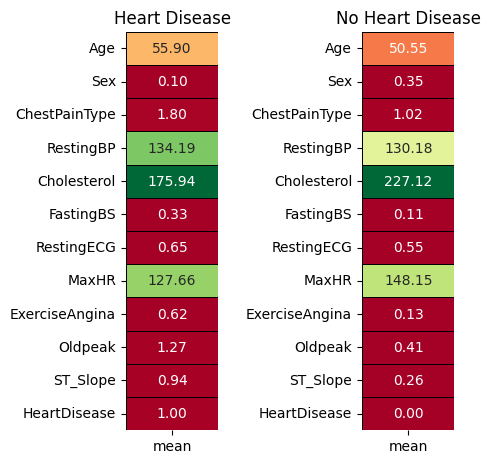

In [9]:
yes = dfn[dfn['HeartDisease'] == 1].describe().T
no = dfn[dfn['HeartDisease'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True, cmap='RdYlGn' ,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True, cmap='RdYlGn' ,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

[]

<Figure size 1500x1000 with 0 Axes>

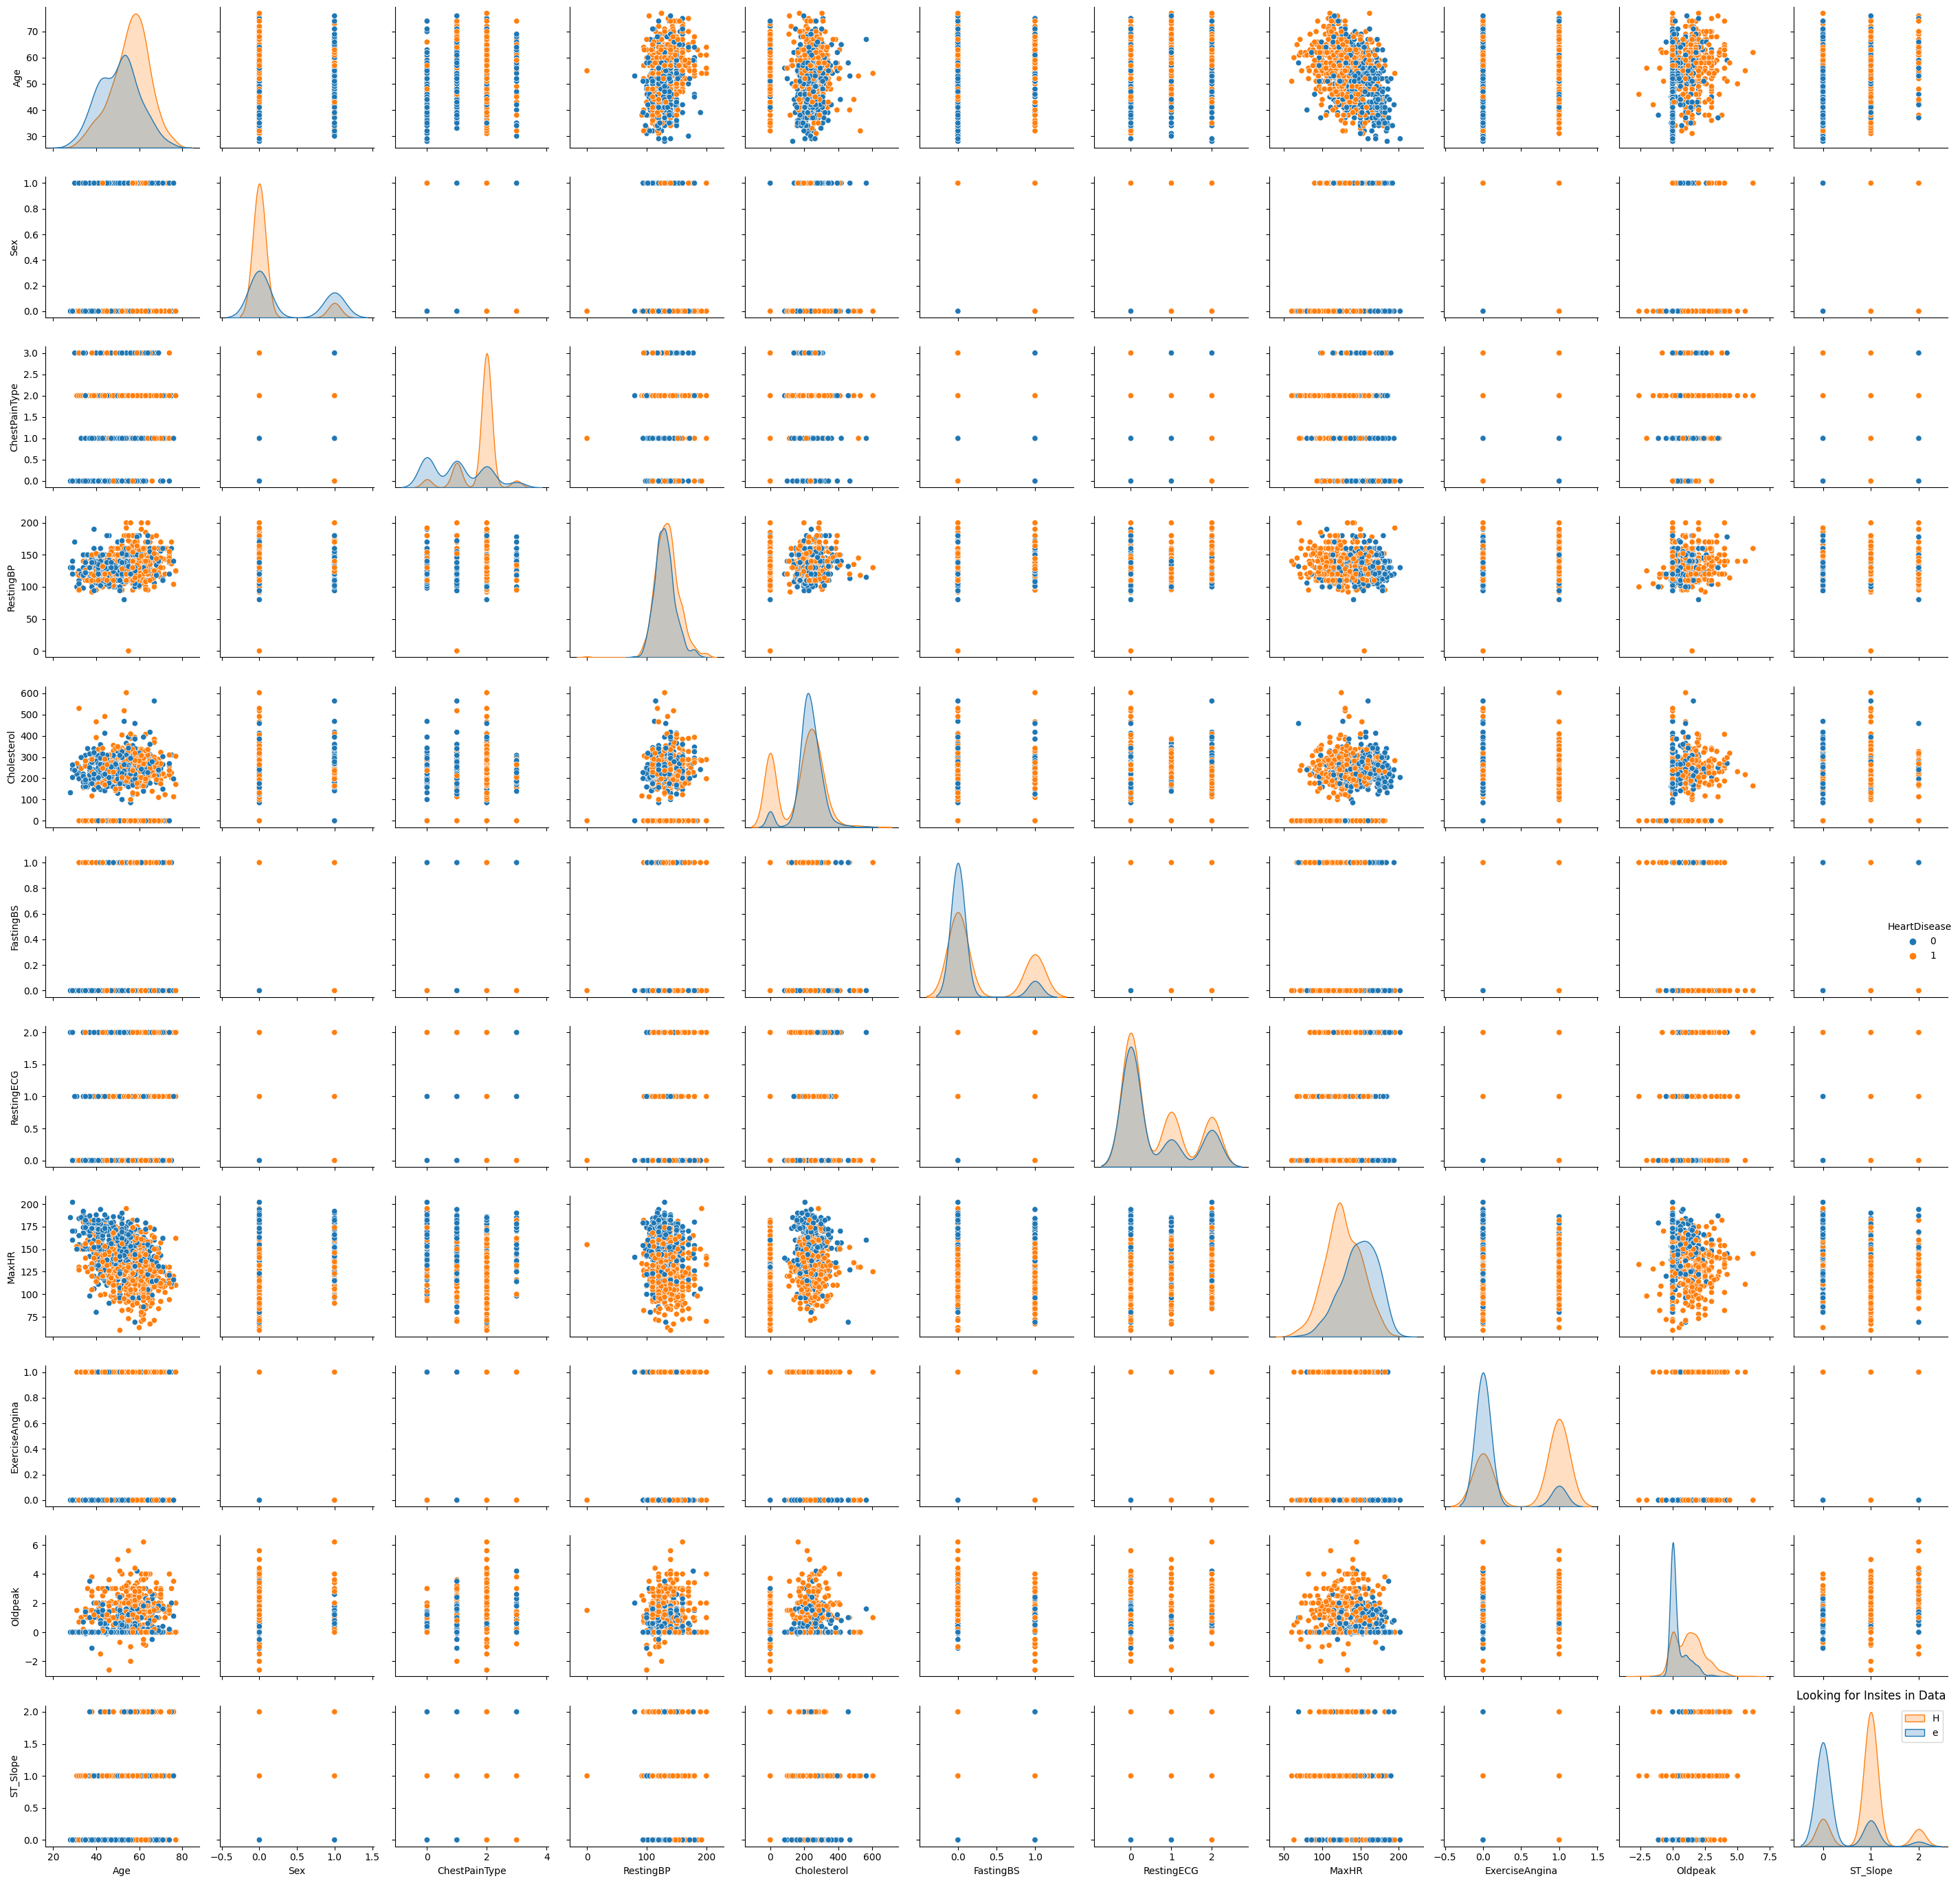

In [10]:
plt.figure(figsize=(15,10))
sns.pairplot(dfn,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

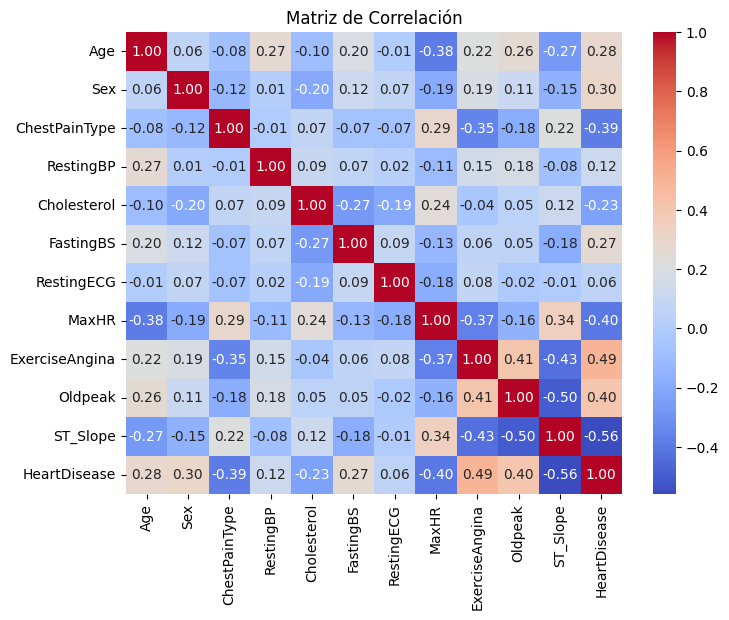

In [24]:
correlation_matrix = dfn.corr()


plt.figure(figsize=(8, 6))  

cmap = sns.color_palette("coolwarm", as_cmap=True, n_colors=5)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()




In [28]:
#Por poca correlacion quitamos las variables RestingECG y RestingBP

df = df.drop(columns = ['RestingECG', 'RestingBP'])
dfn = dfn.drop(columns = ['RestingECG', 'RestingBP'])

Text(0.5, 1.0, 'Distribution of MaxHR by Heart Disease')

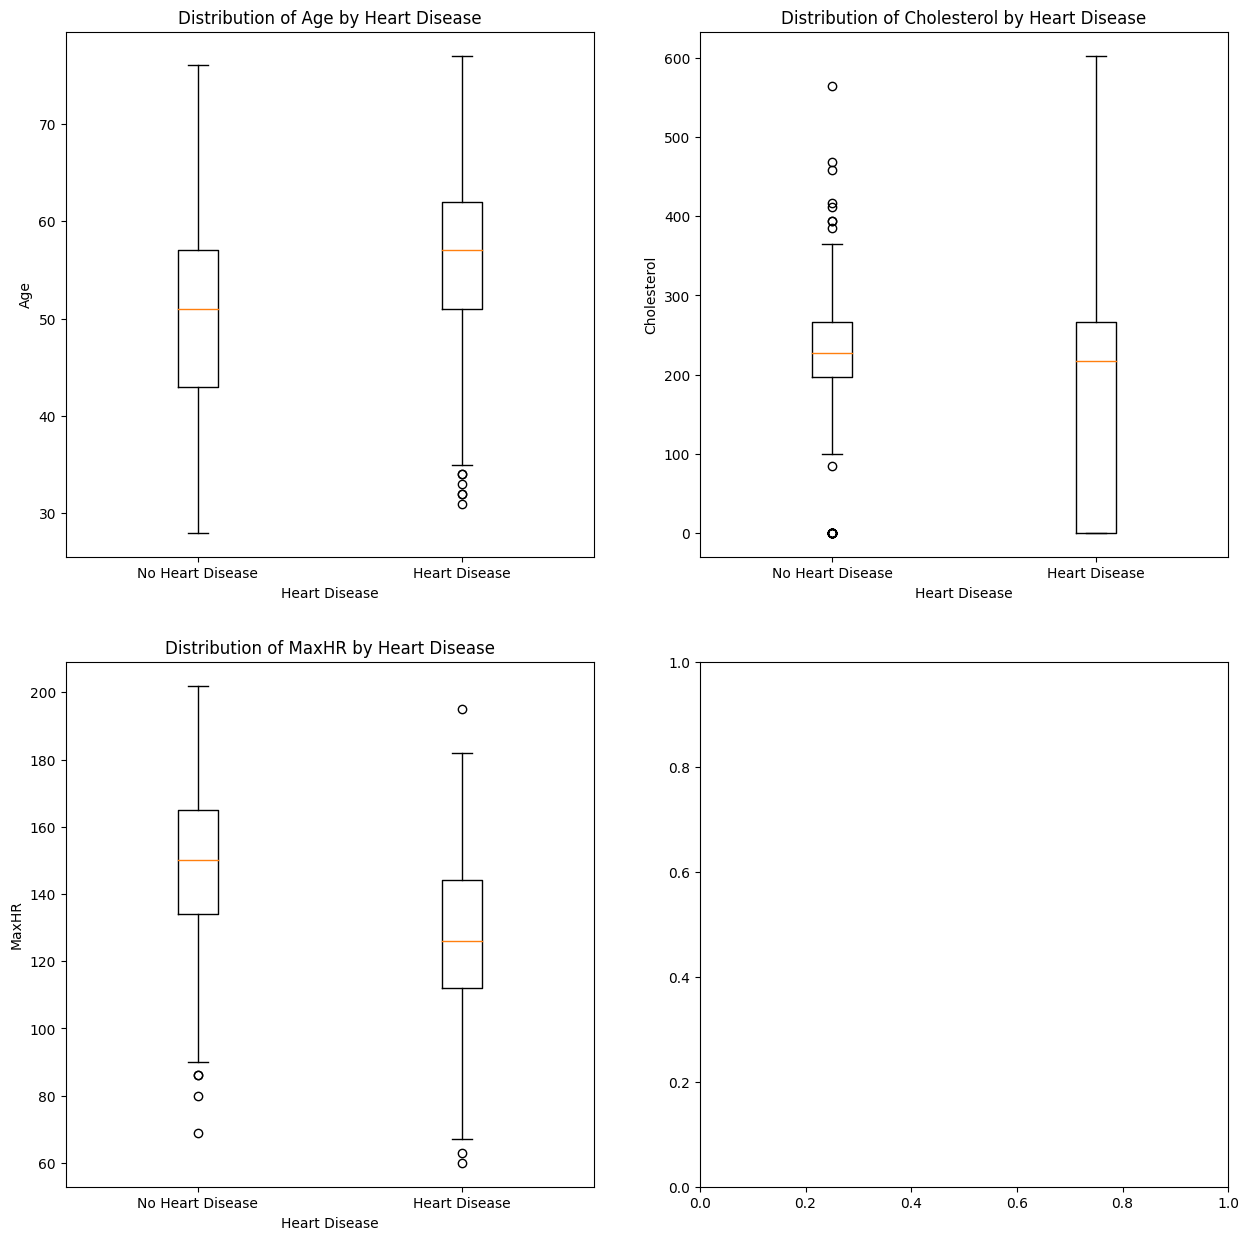

In [29]:
ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

plt.subplot(2,2,1)
plt.boxplot([df[df['HeartDisease'] == 0]['Age'], df[df['HeartDisease'] == 1]['Age']], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease');

plt.subplot(2,2,2)
plt.boxplot([df[df['HeartDisease'] == 0]['Cholesterol'], df[df['HeartDisease'] == 1]['Cholesterol']], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.title('Distribution of Cholesterol by Heart Disease');

plt.subplot(2,2,3)
plt.boxplot([df[df['HeartDisease'] == 0]['MaxHR'], df[df['HeartDisease'] == 1]['MaxHR']], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')
plt.title('Distribution of MaxHR by Heart Disease')



Quitamos los outliers

In [30]:
def quit_outliers(df,columnas):

            columna= str(columnas)
            q1 = df[columna].quantile(0.25)
            q3 = df[columna].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - 3 * iqr
            upper_bound = q3 + 3 * iqr
            df = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]

            return df

In [31]:
print(df.shape,dfn.shape)

(918, 10) (918, 10)


In [33]:
columnas = ['Cholesterol', 'MaxHR']

for columna in columnas:
    dfn = quit_outliers(dfn, columna)
    df = quit_outliers(df, columna)

print(df.shape,dfn.shape)

(916, 10) (916, 10)


# ML modeling

## Dummies and PCA

Haremos el analisis con  One-Hot Encoding y Binary Encoding

In [60]:
def logistic(X,y):
       
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(X_train.shape, X_test.shape)


        model = LogisticRegression()
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print("Accuracy:",  round(accuracy,4))
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", classification_rep)

        return


def svm(X,y):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(X_train.shape, X_test.shape)

        svm_model = SVC(kernel='linear', C=1.0, random_state=42)
        svm_model.fit(X_train, y_train)

        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print("Accuracy:", round(accuracy,4))
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", classification_rep)

        return


In [35]:

df_encoded= pd.get_dummies(df, columns= ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope'])


In [41]:
scaler = StandardScaler()
X = df_encoded.drop(columns= ['HeartDisease'])  # Selecciona las características que deseas escalar
y = df_encoded['HeartDisease']


(916, 16) (916,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(732, 16) (184, 16)


In [64]:
X = df_encoded.drop(columns= ['HeartDisease'])  # Selecciona las características que deseas escalar
y = df_encoded['HeartDisease']
logistic(X,y)
print('\n \n \n \n')#
svm(X,y)



pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca


print('\n \n \n \n')#
print(X_pca.shape, X.shape)


logistic(X_pca,y)
print('\n \n \n \n')#
svm(X_pca,y)

(732, 16) (184, 16)
Accuracy: 0.8641
Confusion Matrix:
 [[67 11]
 [14 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        78
           1       0.89      0.87      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184


 
 
 

(732, 16) (184, 16)
Accuracy: 0.8641
Confusion Matrix:
 [[68 10]
 [15 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        78
           1       0.90      0.86      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


 
 
 

(916, 2) (916, 16)
(732, 2) (184, 2)
Accuracy: 0.6359
Confusion Matrix:
 [[49 29]
 [38 68]]
Classification Report:
               pr

In [65]:
X = dfn.drop(columns= ['HeartDisease'])  # Selecciona las características que deseas escalar
y = dfn['HeartDisease']
logistic(X,y)
print('\n \n \n \n')#
svm(X,y)

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

print('\n \n \n \n')#
print(X_pca.shape, X.shape)

logistic(X_pca,y)
print('\n \n \n \n')#
svm(X_pca,y)

(732, 9) (184, 9)
Accuracy: 0.8261
Confusion Matrix:
 [[63 15]
 [17 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.86      0.84      0.85       106

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184


 
 
 

(732, 9) (184, 9)
Accuracy: 0.8315
Confusion Matrix:
 [[64 14]
 [17 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        78
           1       0.86      0.84      0.85       106

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


 
 
 

(916, 2) (916, 9)
(732, 2) (184, 2)
Accuracy: 0.6359
Confusion Matrix:
 [[49 29]
 [38 68]]
Classification Report:
               precisi

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b540d583-b8bb-42be-81d7-f5c6c259bff3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>